In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
file_path = "../CreditCardData.csv"
df = pd.read_csv(file_path)
df.head(10)

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
5,#3446 698,13-Oct-20,Tuesday,20,MasterCard,Tap,£30,POS,Children,India,India,India,M,48.4,Monzo,0
6,#3652 191,13-Oct-20,Tuesday,18,Visa,CVC,£231,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39.5,Barclays,0
7,#3161 927,13-Oct-20,Tuesday,18,MasterCard,CVC,£154,Online,Services,USA,USA,United Kingdom,M,37.8,HSBC,0
8,#3025 809,13-Oct-20,Tuesday,23,MasterCard,PIN,£39,ATM,Fashion,Russia,Russia,United Kingdom,F,43.3,Metro,0
9,#3413 696,14-Oct-20,Wednesday,23,MasterCard,Tap,£17,POS,Entertainment,India,India,India,M,69.9,Barlcays,0


 ## Details regarding the columns in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

# DATA CLEANING:

## Removing unwanted columns

In [4]:
df.drop(['Day of Week'], axis=1, inplace=True)
df.head(10)

,Transaction ID,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
5,#3446 698,13-Oct-20,20,MasterCard,Tap,£30,POS,Children,India,India,India,M,48.4,Monzo,0
6,#3652 191,13-Oct-20,18,Visa,CVC,£231,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39.5,Barclays,0
7,#3161 927,13-Oct-20,18,MasterCard,CVC,£154,Online,Services,USA,USA,United Kingdom,M,37.8,HSBC,0
8,#3025 809,13-Oct-20,23,MasterCard,PIN,£39,ATM,Fashion,Russia,Russia,United Kingdom,F,43.3,Metro,0
9,#3413 696,14-Oct-20,23,MasterCard,Tap,£17,POS,Entertainment,India,India,India,M,69.9,Barlcays,0


## Standardization of Data 

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df.head(10)

,Transaction ID,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,2020-10-14,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,2020-10-14,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,2020-10-14,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,2020-10-13,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,2020-10-13,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
5,#3446 698,2020-10-13,20,MasterCard,Tap,£30,POS,Children,India,India,India,M,48.4,Monzo,0
6,#3652 191,2020-10-13,18,Visa,CVC,£231,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39.5,Barclays,0
7,#3161 927,2020-10-13,18,MasterCard,CVC,£154,Online,Services,USA,USA,United Kingdom,M,37.8,HSBC,0
8,#3025 809,2020-10-13,23,MasterCard,PIN,£39,ATM,Fashion,Russia,Russia,United Kingdom,F,43.3,Metro,0
9,#3413 696,2020-10-14,23,MasterCard,Tap,£17,POS,Entertainment,India,India,India,M,69.9,Barlcays,0


## Merging Columns

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_timedelta(df['Time'], unit="h")
df['Date'] = df['Date'] + df['Time']
df = df.drop('Time', axis=1)
df.head(10)

,Transaction ID,Date,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,2020-10-14 19:00:00,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,2020-10-14 17:00:00,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,2020-10-14 14:00:00,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,2020-10-13 14:00:00,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,2020-10-13 23:00:00,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
5,#3446 698,2020-10-13 20:00:00,MasterCard,Tap,£30,POS,Children,India,India,India,M,48.4,Monzo,0
6,#3652 191,2020-10-13 18:00:00,Visa,CVC,£231,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39.5,Barclays,0
7,#3161 927,2020-10-13 18:00:00,MasterCard,CVC,£154,Online,Services,USA,USA,United Kingdom,M,37.8,HSBC,0
8,#3025 809,2020-10-13 23:00:00,MasterCard,PIN,£39,ATM,Fashion,Russia,Russia,United Kingdom,F,43.3,Metro,0
9,#3413 696,2020-10-14 23:00:00,MasterCard,Tap,£17,POS,Entertainment,India,India,India,M,69.9,Barlcays,0


## Renaming column Names

In [7]:
df.rename(columns={'Shipping Address': 'Country of Shipping', 'Date': 'Date&Time'}, inplace=True)
df.columns

Index(['Transaction ID', 'Date&Time', 'Type of Card', 'Entry Mode', 'Amount',
       'Type of Transaction', 'Merchant Group', 'Country of Transaction',
       'Country of Shipping', 'Country of Residence', 'Gender', 'Age', 'Bank',
       'Fraud'],
      dtype='object')

## Handling improper text formatting

In [8]:
df['Transaction ID'] = df['Transaction ID'].apply(lambda x: x.replace('#', ''))

df['Transaction ID'] = df['Transaction ID'].apply(lambda x: x.replace(' ', ''))

df.head(10)

,Transaction ID,Date&Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Country of Shipping,Country of Residence,Gender,Age,Bank,Fraud
0,3577209,2020-10-14 19:00:00,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,3039221,2020-10-14 17:00:00,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,2694780,2020-10-14 14:00:00,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,2640960,2020-10-13 14:00:00,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,2771031,2020-10-13 23:00:00,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
5,3446698,2020-10-13 20:00:00,MasterCard,Tap,£30,POS,Children,India,India,India,M,48.4,Monzo,0
6,3652191,2020-10-13 18:00:00,Visa,CVC,£231,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39.5,Barclays,0
7,3161927,2020-10-13 18:00:00,MasterCard,CVC,£154,Online,Services,USA,USA,United Kingdom,M,37.8,HSBC,0
8,3025809,2020-10-13 23:00:00,MasterCard,PIN,£39,ATM,Fashion,Russia,Russia,United Kingdom,F,43.3,Metro,0
9,3413696,2020-10-14 23:00:00,MasterCard,Tap,£17,POS,Entertainment,India,India,India,M,69.9,Barlcays,0


In [9]:
df['Amount'] = df['Amount'].str.replace('£', '')
df.head(10)

,Transaction ID,Date&Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Country of Shipping,Country of Residence,Gender,Age,Bank,Fraud
0,3577209,2020-10-14 19:00:00,Visa,Tap,5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,3039221,2020-10-14 17:00:00,MasterCard,PIN,288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,2694780,2020-10-14 14:00:00,Visa,Tap,5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,2640960,2020-10-13 14:00:00,Visa,Tap,28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,2771031,2020-10-13 23:00:00,Visa,CVC,91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
5,3446698,2020-10-13 20:00:00,MasterCard,Tap,30,POS,Children,India,India,India,M,48.4,Monzo,0
6,3652191,2020-10-13 18:00:00,Visa,CVC,231,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39.5,Barclays,0
7,3161927,2020-10-13 18:00:00,MasterCard,CVC,154,Online,Services,USA,USA,United Kingdom,M,37.8,HSBC,0
8,3025809,2020-10-13 23:00:00,MasterCard,PIN,39,ATM,Fashion,Russia,Russia,United Kingdom,F,43.3,Metro,0
9,3413696,2020-10-14 23:00:00,MasterCard,Tap,17,POS,Entertainment,India,India,India,M,69.9,Barlcays,0


In [10]:
print("Before: ", df['Bank'].unique())

df['Bank'] = df['Bank'].apply(lambda x: "Barclays" if x == "Barlcays" else x)

print("After: ", df['Bank'].unique())

Before:  ['RBS' 'Lloyds' 'Barclays' 'Halifax' 'Monzo' 'HSBC' 'Metro' 'Barlcays']
After:  ['RBS' 'Lloyds' 'Barclays' 'Halifax' 'Monzo' 'HSBC' 'Metro']


## Handling Data Types


In [11]:
df['Age'] = [int(age) for age in df['Age']]


In [12]:
df['Amount'] = df['Amount'].apply(float)
df.head(10)

,Transaction ID,Date&Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Country of Shipping,Country of Residence,Gender,Age,Bank,Fraud
0,3577209,2020-10-14 19:00:00,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25,RBS,0
1,3039221,2020-10-14 17:00:00,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49,Lloyds,0
2,2694780,2020-10-14 14:00:00,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42,Barclays,0
3,2640960,2020-10-13 14:00:00,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51,Barclays,0
4,2771031,2020-10-13 23:00:00,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38,Halifax,1
5,3446698,2020-10-13 20:00:00,MasterCard,Tap,30.0,POS,Children,India,India,India,M,48,Monzo,0
6,3652191,2020-10-13 18:00:00,Visa,CVC,231.0,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39,Barclays,0
7,3161927,2020-10-13 18:00:00,MasterCard,CVC,154.0,Online,Services,USA,USA,United Kingdom,M,37,HSBC,0
8,3025809,2020-10-13 23:00:00,MasterCard,PIN,39.0,ATM,Fashion,Russia,Russia,United Kingdom,F,43,Metro,0
9,3413696,2020-10-14 23:00:00,MasterCard,Tap,17.0,POS,Entertainment,India,India,India,M,69,Barclays,0


## Handling Null Values

In [13]:
df[pd.isnull(df['Merchant Group'])]['Merchant Group']

286      NaN
1720     NaN
2092     NaN
6404     NaN
58262    NaN
60272    NaN
75522    NaN
88360    NaN
91322    NaN
96289    NaN
Name: Merchant Group, dtype: object

In [14]:
df['Merchant Group'].unique()

array(['Entertainment', 'Services', 'Restaurant', 'Electronics',
       'Children', 'Fashion', 'Food', 'Products', 'Subscription',
       'Gaming', nan], dtype=object)

In [15]:

merchant_group_column = df['Merchant Group']
mode_merchant_group = merchant_group_column.mode()
df['Merchant Group'].fillna(mode_merchant_group.iloc[0], inplace=True)

In [16]:
df[pd.isnull(df['Country of Shipping'])]['Country of Shipping']

4913     NaN
6208     NaN
8299     NaN
8436     NaN
42573    NaN
Name: Country of Shipping, dtype: object

In [17]:
df['Country of Shipping'].unique()

array(['United Kingdom', 'USA', 'India', 'Russia', 'China', nan],
      dtype=object)

In [18]:
shipping_country_column = df['Country of Shipping']
mode_shipping_country = shipping_country_column.mode()
df['Country of Shipping'].fillna(mode_shipping_country.iloc[0], inplace=True)
df.head(10)

,Transaction ID,Date&Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Country of Shipping,Country of Residence,Gender,Age,Bank,Fraud
0,3577209,2020-10-14 19:00:00,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25,RBS,0
1,3039221,2020-10-14 17:00:00,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49,Lloyds,0
2,2694780,2020-10-14 14:00:00,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42,Barclays,0
3,2640960,2020-10-13 14:00:00,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51,Barclays,0
4,2771031,2020-10-13 23:00:00,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38,Halifax,1
5,3446698,2020-10-13 20:00:00,MasterCard,Tap,30.0,POS,Children,India,India,India,M,48,Monzo,0
6,3652191,2020-10-13 18:00:00,Visa,CVC,231.0,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39,Barclays,0
7,3161927,2020-10-13 18:00:00,MasterCard,CVC,154.0,Online,Services,USA,USA,United Kingdom,M,37,HSBC,0
8,3025809,2020-10-13 23:00:00,MasterCard,PIN,39.0,ATM,Fashion,Russia,Russia,United Kingdom,F,43,Metro,0
9,3413696,2020-10-14 23:00:00,MasterCard,Tap,17.0,POS,Entertainment,India,India,India,M,69,Barclays,0


In [19]:
df[pd.isnull(df['Gender'])]['Gender']

383      NaN
60272    NaN
91322    NaN
93311    NaN
Name: Gender, dtype: object

In [20]:
df.dropna(subset=['Gender'], inplace=True)
df.head(10)

,Transaction ID,Date&Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Country of Shipping,Country of Residence,Gender,Age,Bank,Fraud
0,3577209,2020-10-14 19:00:00,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25,RBS,0
1,3039221,2020-10-14 17:00:00,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49,Lloyds,0
2,2694780,2020-10-14 14:00:00,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42,Barclays,0
3,2640960,2020-10-13 14:00:00,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51,Barclays,0
4,2771031,2020-10-13 23:00:00,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38,Halifax,1
5,3446698,2020-10-13 20:00:00,MasterCard,Tap,30.0,POS,Children,India,India,India,M,48,Monzo,0
6,3652191,2020-10-13 18:00:00,Visa,CVC,231.0,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39,Barclays,0
7,3161927,2020-10-13 18:00:00,MasterCard,CVC,154.0,Online,Services,USA,USA,United Kingdom,M,37,HSBC,0
8,3025809,2020-10-13 23:00:00,MasterCard,PIN,39.0,ATM,Fashion,Russia,Russia,United Kingdom,F,43,Metro,0
9,3413696,2020-10-14 23:00:00,MasterCard,Tap,17.0,POS,Entertainment,India,India,India,M,69,Barclays,0


## Imputation of Missing Values

In [21]:
df[pd.isnull(df['Amount'])]['Amount']

34456   NaN
35068   NaN
61927   NaN
80125   NaN
82488   NaN
93330   NaN
Name: Amount, dtype: float64

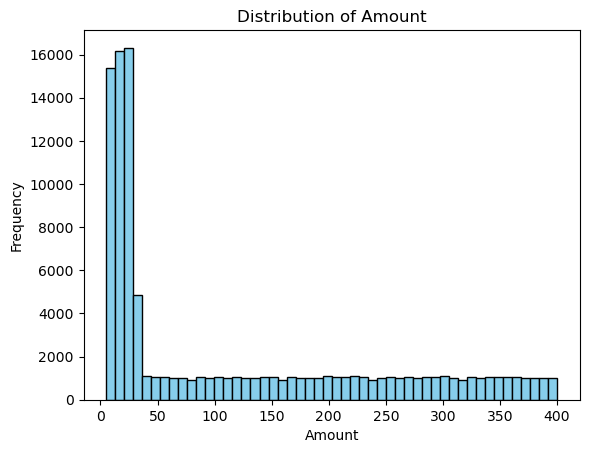

In [22]:
plt.hist(df['Amount'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount')
plt.show()

df['Amount'].fillna(0, inplace=True)

## Outliers

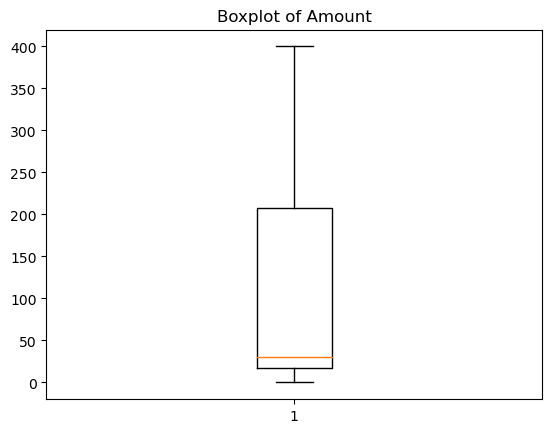

In [23]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

plt.boxplot(df['Amount'])
plt.title('Boxplot of Amount')
plt.show()

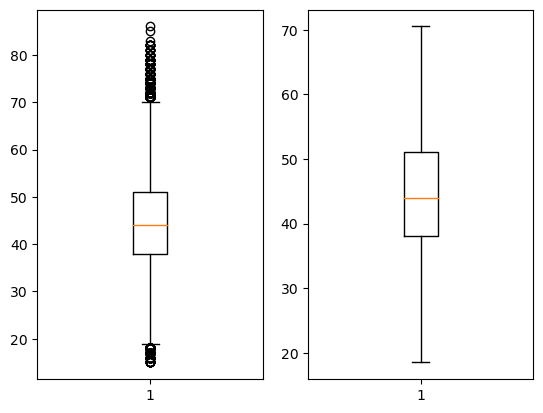

In [24]:
f, axes = plt.subplots(1, 2)

axes[0].boxplot(df['Age'])

Q1_age = np.quantile(df['Age'], 0.25)
Q3_age = np.quantile(df['Age'], 0.75)
median_age = np.quantile(df['Age'], 0.5)

IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

df['Age'] = np.where(df['Age'] > upper_bound_age, upper_bound_age, np.where(df['Age'] < lower_bound_age, lower_bound_age, df['Age']))

axes[1].boxplot(df['Age'])
plt.show()

## Handling Duplicate values

In [25]:
original_length = len(df)
df.drop_duplicates(inplace=True)
cleaned_length = len(df)
print("Original Length:", original_length)
print("Cleaned Length:", cleaned_length)

Original Length: 99996
Cleaned Length: 99996


## Encoding

In [26]:
categorical_cols = ['Type of Card', 'Entry Mode', 'Type of Transaction', 
                    'Merchant Group', 'Country of Residence', 
                    'Country of Shipping', 'Country of Transaction', 'Bank']

df = pd.get_dummies(data=df, columns=categorical_cols, dtype="int")

In [27]:
gender_mapping = {'M': 0, 'F': 1}

df['Gender'] = df['Gender'].map(gender_mapping)

df.head(10)

,Transaction ID,Date&Time,Amount,Gender,Age,Fraud,Type of Card_MasterCard,Type of Card_Visa,Entry Mode_CVC,Entry Mode_PIN,...,Country of Transaction_Russia,Country of Transaction_USA,Country of Transaction_United Kingdom,Bank_Barclays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
0,3577209,2020-10-14 19:00:00,5.0,0,25.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,3039221,2020-10-14 17:00:00,288.0,1,49.0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,2694780,2020-10-14 14:00:00,5.0,1,42.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2640960,2020-10-13 14:00:00,28.0,1,51.0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
4,2771031,2020-10-13 23:00:00,91.0,0,38.0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,0
5,3446698,2020-10-13 20:00:00,30.0,0,48.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,3652191,2020-10-13 18:00:00,231.0,0,39.0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0
7,3161927,2020-10-13 18:00:00,154.0,0,37.0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
8,3025809,2020-10-13 23:00:00,39.0,1,43.0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
9,3413696,2020-10-14 23:00:00,17.0,0,69.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Exploratory Data Analysis:

In [28]:
df.describe()

,Amount,Gender,Age,Fraud,Type of Card_MasterCard,Type of Card_Visa,Entry Mode_CVC,Entry Mode_PIN,Entry Mode_Tap,Type of Transaction_ATM,...,Country of Transaction_Russia,Country of Transaction_USA,Country of Transaction_United Kingdom,Bank_Barclays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
count,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,...,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000
mean,112.569983,0.491230,44.534021,0.071953,0.461878,0.538122,0.334803,0.499760,0.165437,0.332733,...,0.072563,0.072983,0.711988,0.399286,0.099564,0.099874,0.099654,0.100124,0.101034,0.100464
std,123.433431,0.499926,9.896884,0.258411,0.498547,0.498547,0.471924,0.500002,0.371576,0.471194,...,0.259419,0.260110,0.452839,0.489754,0.299419,0.299833,0.299540,0.300167,0.301375,0.300619
min,0.000000,0.000000,18.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,0.000000,44.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,208.000000,1.000000,51.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,400.000000,1.000000,70.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Violin Plot of Transaction Amount Distribution

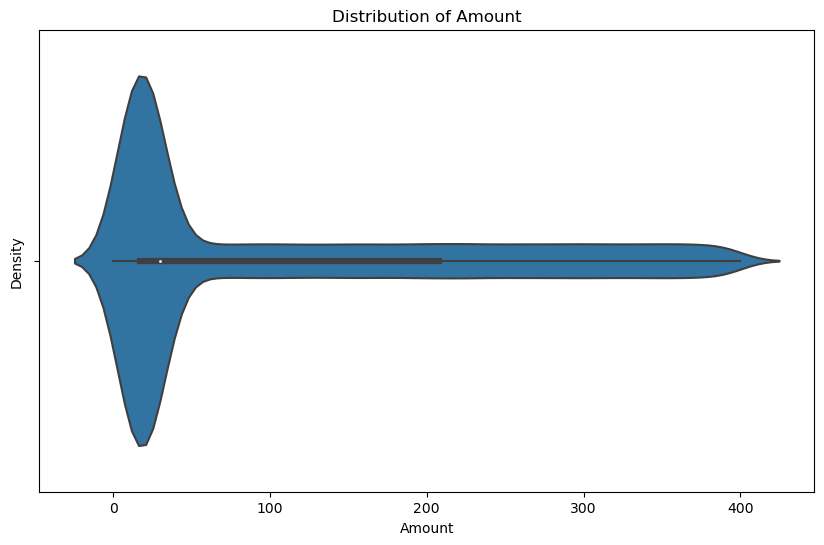

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Amount', data=df)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

## Distribution of Transactions by Gender

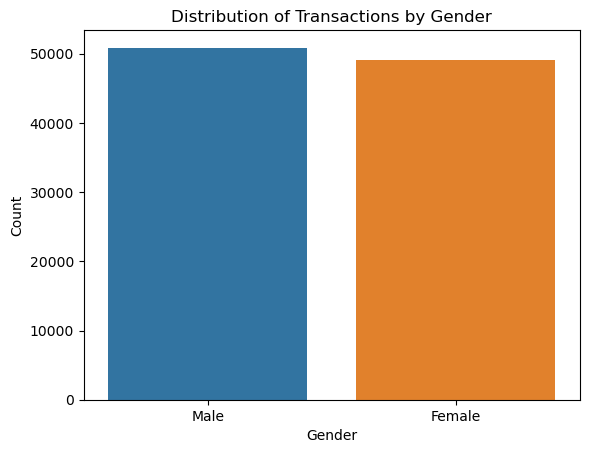

In [30]:
gender_mapping = {0: 'Male', 1: 'Female'}


df['Gender_Decoded'] = df['Gender'].map(gender_mapping)

sns.countplot(x='Gender_Decoded', data=df)
plt.title('Distribution of Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Distribution of Transactions by Card Type

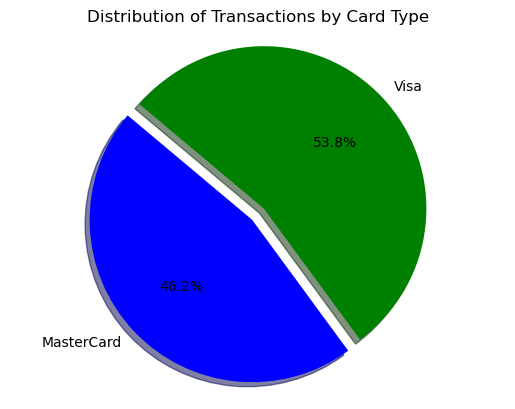

In [31]:
mastercard_count = df['Type of Card_MasterCard'].sum()
visa_count = df['Type of Card_Visa'].sum()

labels = ['MasterCard', 'Visa']
sizes = [mastercard_count, visa_count]
colors = ['blue', 'green']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Distribution of Transactions by Card Type')
plt.show()

## Distribution of Transactions by Entry Mode

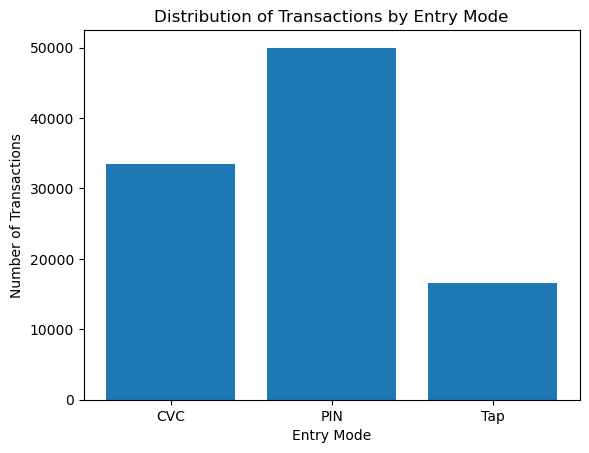

In [32]:
cvc_count = df['Entry Mode_CVC'].sum()
pin_count = df['Entry Mode_PIN'].sum()
tap_count = df['Entry Mode_Tap'].sum()

plt.bar(['CVC', 'PIN', 'Tap'], [cvc_count, pin_count, tap_count])
plt.xlabel('Entry Mode')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transactions by Entry Mode')
plt.show()

## Distribution of Fraud vs. Non-Fraud Transactions

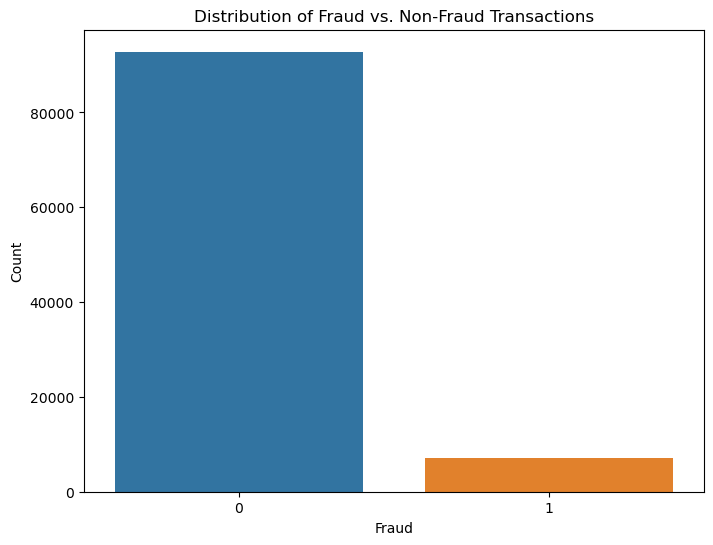

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Fraud', data=df)
plt.title('Distribution of Fraud vs. Non-Fraud Transactions')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

## Fraud Distribution by Gender

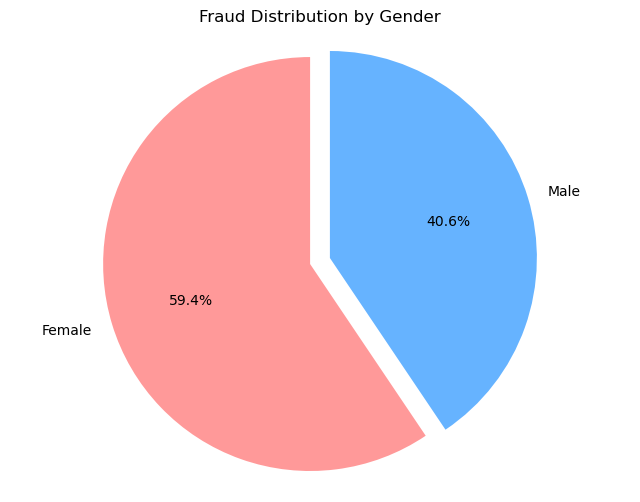

In [34]:
fraud_by_gender = df.groupby(['Gender', 'Fraud']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.pie(fraud_by_gender[1], labels=['Female', 'Male'], colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)

plt.axis('equal')  
plt.title('Fraud Distribution by Gender')
plt.show()

## Distribution of Card Types by Fraud Type

<Figure size 1000x600 with 0 Axes>

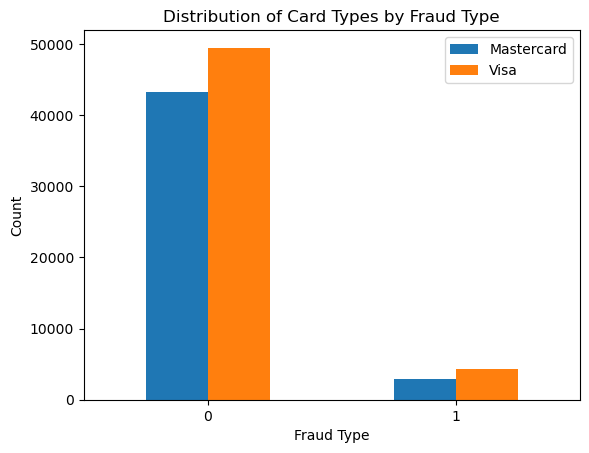

In [35]:
card_type_fraud_counts = df.groupby('Fraud')[['Type of Card_MasterCard', 'Type of Card_Visa']].sum()

plt.figure(figsize=(10, 6))
card_type_fraud_counts.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'])

plt.title('Distribution of Card Types by Fraud Type')
plt.xlabel('Fraud Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(labels=['Mastercard', 'Visa'], loc='upper right')
plt.show()

## Distribution of Entry Modes by Fraud Type

<Figure size 1000x600 with 0 Axes>

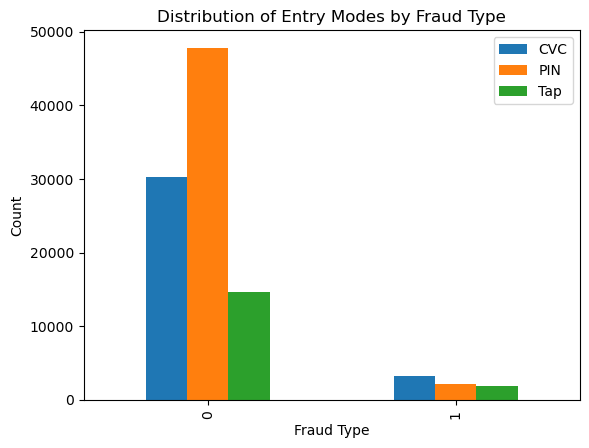

In [36]:
entry_modes = ['Entry Mode_CVC', 'Entry Mode_PIN', 'Entry Mode_Tap']

entry_mode_fraud_counts = df.groupby(['Fraud'])[entry_modes].sum()

plt.figure(figsize=(10, 6))
entry_mode_fraud_counts.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribution of Entry Modes by Fraud Type')
plt.xlabel('Fraud Type')
plt.ylabel('Count')
plt.legend(labels=['CVC', 'PIN', 'Tap'])
plt.show()

## Fraud Distribution by Country of Transaction

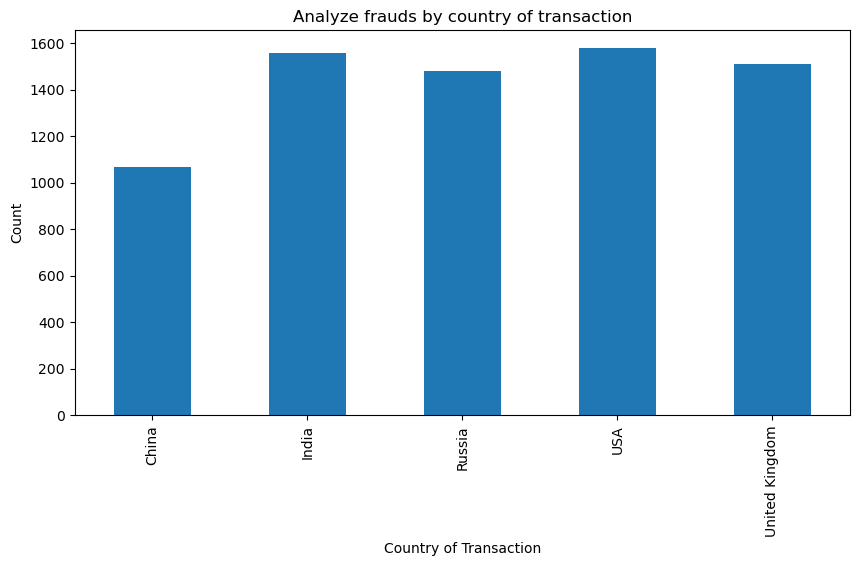

In [37]:
plt.figure(figsize=(10, 5))
country_columns = [col for col in df.columns if col.startswith('Country of Transaction_')]
country_counts = df.groupby(country_columns)['Fraud'].sum()
country_labels = [col.split('_')[-1] for col in country_columns]
country_counts.index = country_labels

country_counts.plot(kind='bar')
plt.title('Analyze frauds by country of transaction')
plt.xlabel('Country of Transaction')
plt.ylabel('Count')
plt.show()

## Fraud Distribution by Age

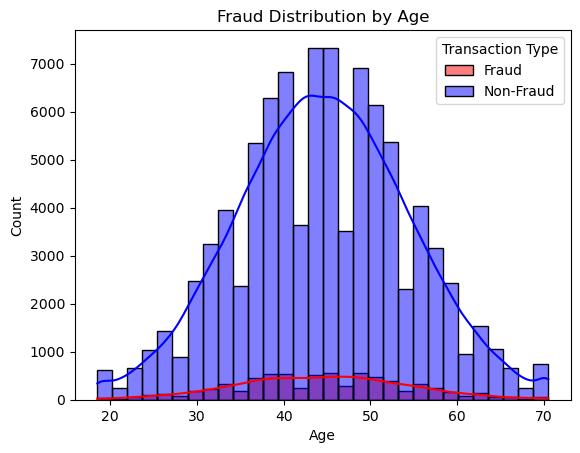

In [38]:
sns.histplot(x='Age', data=df[df['Fraud'] == 1], bins=30, kde=True, color='red', alpha=0.5, label='Fraud')
sns.histplot(x='Age', data=df[df['Fraud'] == 0], bins=30, kde=True, color='blue', alpha=0.5, label='Non-Fraud')

plt.title('Fraud Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Transaction Type', loc='upper right')
plt.show()

## Fraud Transactions by Bank

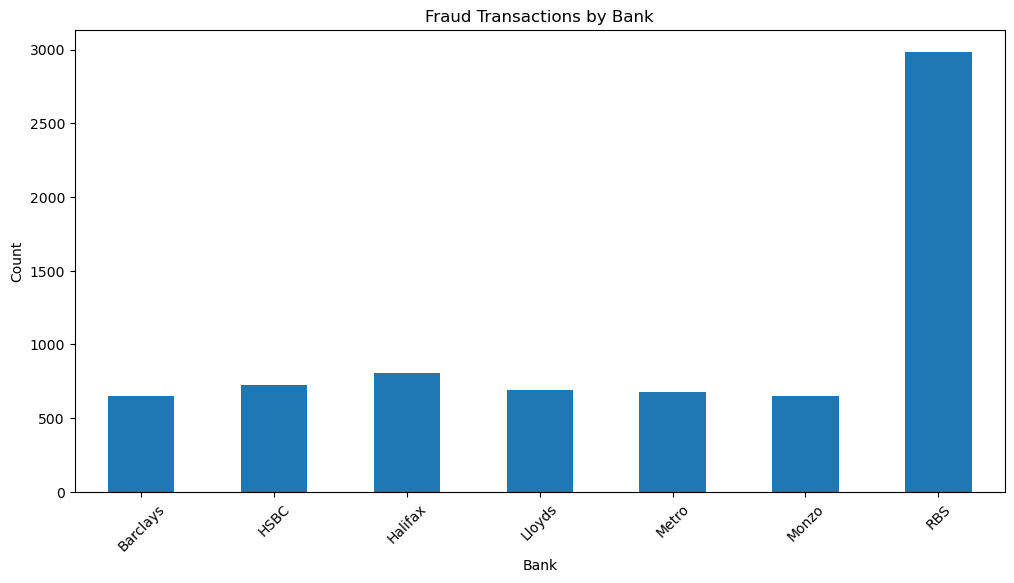

In [39]:
bank_columns = [col for col in df.columns if col.startswith('Bank_')]
bank_labels = [col.split('_')[-1] for col in bank_columns]
bank_fraud_counts = df.groupby(bank_columns)['Fraud'].sum()
bank_fraud_counts.index = bank_labels

plt.figure(figsize=(12, 6))
bank_fraud_counts.plot(kind='bar')
plt.title('Fraud Transactions by Bank')
plt.xlabel('Bank')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Fraud and Non-Fraud Transaction Counts vs Transaction Hour:

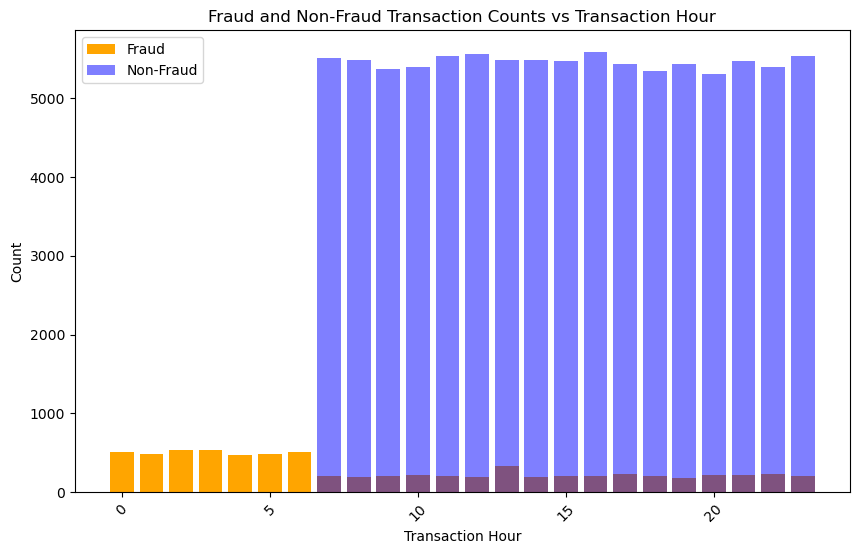

In [40]:

df['Date&Time'] = pd.to_datetime(df['Date&Time'])


df['Transaction Hour'] = df['Date&Time'].dt.hour


fraud_hour_counts = df[df['Fraud'] == 1].groupby('Transaction Hour').size()
non_fraud_hour_counts = df[df['Fraud'] == 0].groupby('Transaction Hour').size()


plt.figure(figsize=(10, 6))
plt.bar(fraud_hour_counts.index, fraud_hour_counts.values, color='orange', label='Fraud')
plt.bar(non_fraud_hour_counts.index, non_fraud_hour_counts.values, color='blue', alpha=0.5, label='Non-Fraud')
plt.title('Fraud and Non-Fraud Transaction Counts vs Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Checking the correlation between each and every columns

In [41]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\pavan\AppData\Local\Temp\ipykernel_35200\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Amount,Gender,Age,Fraud,Type of Card_MasterCard,Type of Card_Visa,Entry Mode_CVC,Entry Mode_PIN,Entry Mode_Tap,Type of Transaction_ATM,...,Country of Transaction_USA,Country of Transaction_United Kingdom,Bank_Barclays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS,Transaction Hour
Amount,1.000000,0.000299,-0.004726,-0.109875,-0.001367,0.001367,-0.000836,0.255759,-0.343095,-0.000714,...,-0.000650,-0.000186,0.007758,-0.005683,-0.003256,-0.005410,0.005619,-0.005167,0.001229,0.029914
Gender,0.000299,1.000000,0.004052,-0.047639,-0.000158,0.000158,0.002718,-0.001349,-0.001637,-0.001027,...,-0.000538,-0.000247,-0.001688,-0.003319,-0.001929,0.002531,0.002453,-0.001851,0.004865,0.015572
Age,-0.004726,0.004052,1.000000,-0.002830,-0.001249,0.001249,-0.001323,-0.003444,0.006315,-0.000865,...,-0.003814,0.004076,-0.001651,0.005350,0.001349,-0.005597,0.007741,-0.000277,-0.005858,-0.001233
Fraud,-0.109875,-0.047639,-0.002830,1.000000,-0.034793,0.034793,0.064955,-0.112212,0.068498,-0.059218,...,0.153825,-0.346523,0.008782,-0.008190,-0.004981,-0.003102,0.010908,0.000136,-0.009119,-0.286532
Type of Card_MasterCard,-0.001367,-0.000158,-0.001249,-0.034793,1.000000,-1.000000,0.006791,-0.004971,-0.001936,-0.006412,...,0.000556,-0.003096,-0.002598,-0.001773,-0.001390,0.003843,0.001248,0.000975,0.001332,0.014702
Type of Card_Visa,0.001367,0.000158,0.001249,0.034793,-1.000000,1.000000,-0.006791,0.004971,0.001936,0.006412,...,-0.000556,0.003096,0.002598,0.001773,0.001390,-0.003843,-0.001248,-0.000975,-0.001332,-0.014702
Entry Mode_CVC,-0.000836,0.002718,-0.001323,0.064955,0.006791,-0.006791,1.000000,-0.709106,-0.315868,-0.500978,...,-0.001173,0.004087,-0.001242,-0.003560,-0.000614,0.006628,-0.000498,-0.001021,0.001097,-0.025142
Entry Mode_PIN,0.255759,-0.001349,-0.003444,-0.112212,-0.004971,0.004971,-0.709106,1.000000,-0.445018,0.706491,...,0.001288,-0.000394,0.002576,0.004368,0.002061,-0.007552,0.003025,-0.003522,-0.002567,0.036282
Entry Mode_Tap,-0.343095,-0.001637,0.006315,0.068498,-0.001936,0.001936,-0.315868,-0.445018,1.000000,-0.314401,...,-0.000244,-0.004661,-0.001890,-0.001356,-0.001994,0.001745,-0.003439,0.006036,0.002061,-0.016891
Type of Transaction_ATM,-0.000714,-0.001027,-0.000865,-0.059218,-0.006412,0.006412,-0.500978,0.706491,-0.314401,1.000000,...,0.000058,-0.002450,0.000085,0.003708,0.002972,-0.004725,0.000684,-0.001310,-0.001457,0.020788


## Correlation Heat Map

<Axes: >

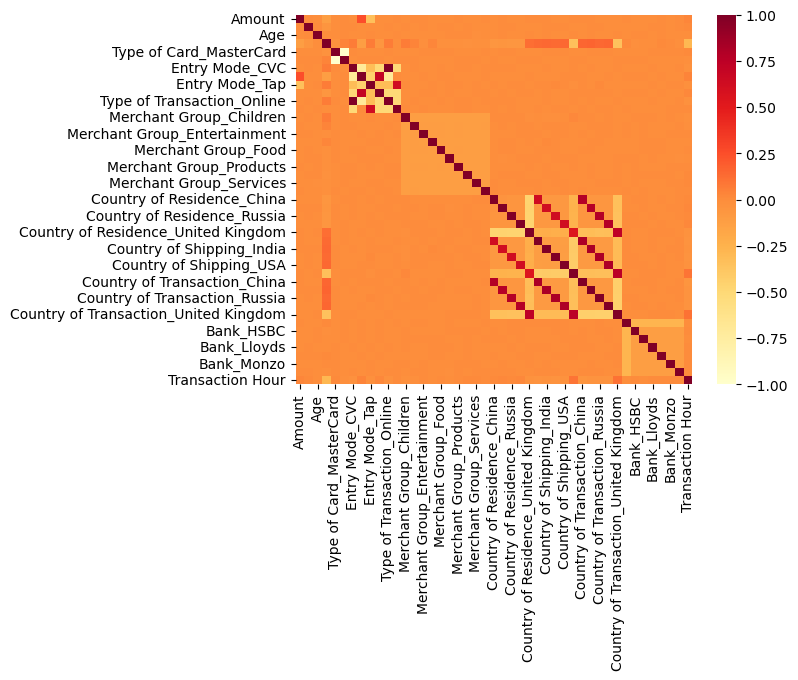

In [42]:
sns.heatmap(correlation_matrix, cmap="YlOrRd")

## Normalization for further analysis

In [43]:
columns_to_normalize = ["Age", "Amount"]

scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()

,Transaction ID,Date&Time,Amount,Gender,Age,Fraud,Type of Card_MasterCard,Type of Card_Visa,Entry Mode_CVC,Entry Mode_PIN,...,Country of Transaction_United Kingdom,Bank_Barclays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS,Gender_Decoded,Transaction Hour
0,3577209,2020-10-14 19:00:00,-0.871486,0,-1.973765,0,0,1,0,0,...,1,0,0,0,0,0,0,1,Male,19
1,3039221,2020-10-14 17:00:00,1.421259,1,0.451253,0,1,0,0,1,...,0,0,0,0,1,0,0,0,Female,17
2,2694780,2020-10-14 14:00:00,-0.871486,1,-0.256044,0,0,1,0,0,...,0,1,0,0,0,0,0,0,Female,14
3,2640960,2020-10-13 14:00:00,-0.685150,1,0.653338,0,0,1,0,0,...,1,1,0,0,0,0,0,0,Female,14
4,2771031,2020-10-13 23:00:00,-0.174751,0,-0.660213,1,0,1,1,0,...,0,0,0,1,0,0,0,0,Male,23


In [44]:
columns_to_drop = ['Transaction ID', 'Date&Time', 'Gender_Decoded', 'Transaction Hour']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Amount,Gender,Age,Fraud,Type of Card_MasterCard,Type of Card_Visa,Entry Mode_CVC,Entry Mode_PIN,Entry Mode_Tap,Type of Transaction_ATM,...,Country of Transaction_Russia,Country of Transaction_USA,Country of Transaction_United Kingdom,Bank_Barclays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
0,-0.871486,0,-1.973765,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1.421259,1,0.451253,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,-0.871486,1,-0.256044,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,-0.685150,1,0.653338,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
4,-0.174751,0,-0.660213,1,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


#  Machine Learning Algorithms:-


## Defining global variables for accuracy analysis

In [45]:
accuracy_lg = None
accuracy_nb = None
accuracy_svm = None
accuracy_km = None
accuracy_rf = None
accuracy_gbm = None
accuracy_mlp = None

## Logistic regression:


Accuracy: 0.9683
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

   Not Fraud       0.98      0.99      0.98     18562
       Fraud       0.81      0.73      0.77      1438

    accuracy                           0.97     20000
   macro avg       0.89      0.86      0.88     20000
weighted avg       0.97      0.97      0.97     20000



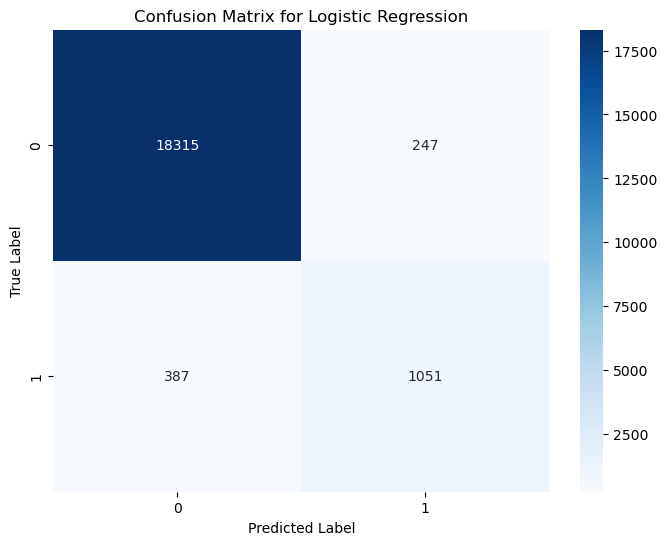

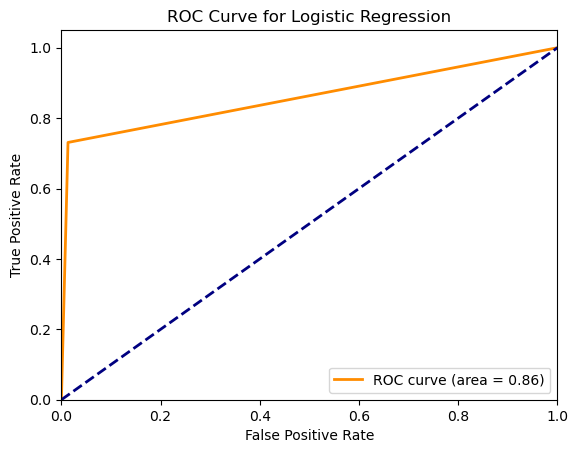

In [46]:
def evaluate_logistic_regression(df):
    global accuracy_lg
    X = df.drop('Fraud', axis=1)
    y = df['Fraud']
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

   
    y_pred = log_reg.predict(X_test)
    
    accuracy_lg = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy_lg)
    
    classification_rep = classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud'])
    print("Classification Report for Logistic Regression:")
    print(classification_rep)

    
    conf_matrix = confusion_matrix(y_test, y_pred)

    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix for Logistic Regression')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Logistic Regression')
    plt.legend(loc="lower right")
    plt.show()


evaluate_logistic_regression(df)


### Effectiveness of Logistic Regression Algorithm for Credit Card Fraud Detection:

- Logistic Regression proves highly effective for credit card fraud detection.
- Strong performance metrics include precision, recall, and accuracy.
- Precision of 0.81 and recall of 0.73 minimize false positives.
- Interpretability and robustness enhance risk assessment.
- AUC of 0.86 highlights discriminative power.
- Logistic Regression is a reliable solution for fraud detection, safeguarding against financial losses and maintaining customer trust.

## Naive Bayes:


Accuracy: 0.88135
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.87      0.93     18562
       Fraud       0.38      0.98      0.54      1438

    accuracy                           0.88     20000
   macro avg       0.69      0.93      0.74     20000
weighted avg       0.95      0.88      0.90     20000



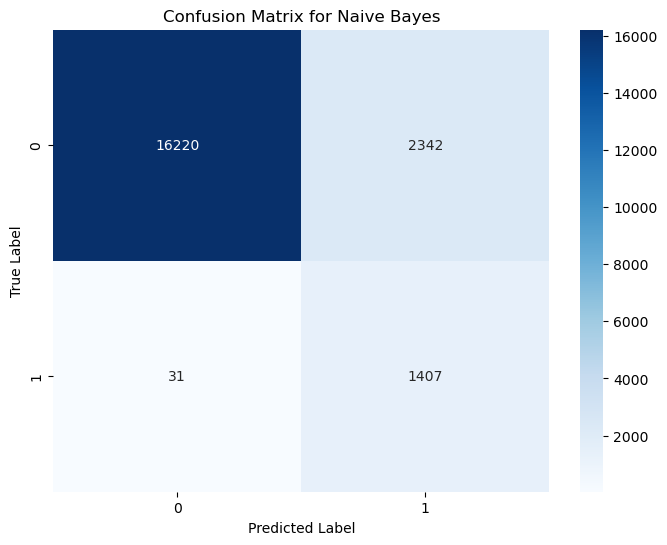

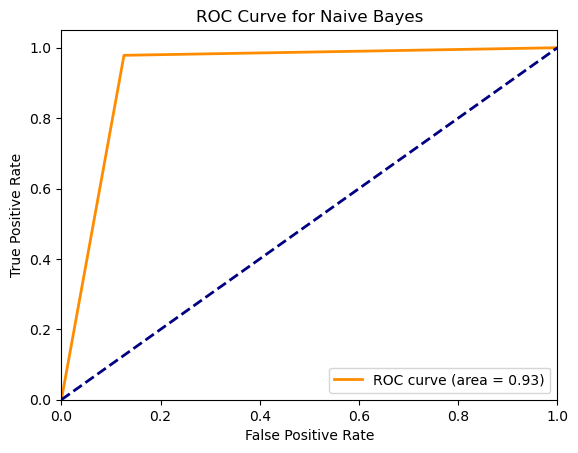

In [47]:
def evaluate_naive_bayes(df):
    
    global accuracy_nb
    X = df.drop('Fraud', axis=1)
    y = df['Fraud']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    
    y_pred = nb_model.predict(X_test)
    
    accuracy_nb = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy_nb)
    
    classification_rep = classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud'])
    print("Classification Report for Naive Bayes:")
    print(classification_rep)

    
    conf_matrix = confusion_matrix(y_test, y_pred)

    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix for Naive Bayes')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Naive Bayes')
    plt.legend(loc="lower right")
    plt.show()


evaluate_naive_bayes(df)


### Effectiveness of Naive Bayes Algorithm for Credit Card Fraud Detection:
- Naive Bayes demonstrates effectiveness in certain aspects of credit card fraud detection:
- High Recall: Naive Bayes achieves a high recall of 0.98 for the "Fraud" class, indicating its ability to effectively capture most of the actual fraudulent transactions.
- Good Discriminative Power: The ROC curve's AUC score of 0.93 indicates that the Naive Bayes model has strong discriminative power and can effectively distinguish between fraudulent and non-fraudulent transactions.
- Efficiency and Scalability: Naive Bayes is computationally efficient and can handle large volumes of transaction data with high dimensionality, making it suitable for real-time credit card fraud detection systems.
- However, Naive Bayes also shows limitations, particularly in precision for the "Fraud" class, where it achieves a relatively low precision of 0.38. This suggests a higher rate of false positives, which could lead to legitimate transactions being incorrectly flagged as fraudulent.

##  Support Vector Machines:

In [ ]:
def evaluate_svm_rbf(df):
    global accuracy_svm
    X = df.drop('Fraud', axis=1)
    y = df['Fraud']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    svm_model = SVC(kernel='rbf', random_state=42)
    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)
    
    accuracy_svm = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy_svm)

    classification_rep = classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud'])
    print("Classification Report for SVM with RBF Kernel:")
    print(classification_rep)

    conf_matrix = confusion_matrix(y_test, y_pred)
   
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix for SVM with RBF Kernel')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for SVM with RBF Kernel')
    plt.legend(loc="lower right")
    plt.show()

evaluate_svm_rbf(df)


### Effectiveness of SVM Algorithm for Credit Card Fraud Detection:

- Strong Accuracy: The Support Vector Machine (SVM) algorithm with an RBF kernel demonstrates robust performance in classifying both fraudulent and non-fraudulent transactions, achieving an overall accuracy of 97%.
- High Precision: SVM achieves a precision of 0.98 for non-fraudulent transactions and 0.89 for fraudulent ones, highlighting its ability to accurately identify instances of fraud.
- Discriminative Power: The SVM's AUC score of 0.86 reflects its capability to distinguish between fraudulent and non-fraudulent transactions with a high degree of precision.

## K Means Clustering:


In [ ]:
def evaluate_kmeans(df):
    global accuracy_km
    X = df.drop('Fraud', axis=1)
    y = df['Fraud']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   
    num_clusters = 2  
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_train)

    y_pred = kmeans.predict(X_test)
    
    cluster_label = y_pred[0]
    y_pred_binary = [1 if label == cluster_label else 0 for label in y_pred]
    
    accuracy_km = accuracy_score(y_test, y_pred_binary)
    print("Accuracy:", accuracy_km)
    
    classification_rep = classification_report(y_test, y_pred_binary, target_names=['Not Fraud', 'Fraud'])
    print("Classification Report for Kmeans:")
    print(classification_rep)
    
    conf_matrix = confusion_matrix(y_test, y_pred_binary)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues' )
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.title('Confusion Matrix for KMeans')
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for KMeans')
    plt.legend(loc="lower right")
    plt.show()

evaluate_kmeans(df)


### Effectiveness of KMeans Algorithm for Credit Card Fraud Detection:

- Limited Performance: The KMeans algorithm demonstrated limited effectiveness for credit card fraud detection, with a precision of 0.03 and recall of 0.14 for the "Fraud" class.
- High Misclassifications: The confusion matrix revealed a high number of false positives (6246) and false negatives (1239), indicating significant misclassifications of both fraudulent and non-fraudulent transactions.
- Poor Discriminative Power: The low ROC curve area of 0.40 further highlights the algorithm's poor discriminative power, suggesting its struggles in accurately distinguishing between fraudulent and non-fraudulent transactions.
- Suboptimal Performance: Overall, KMeans showed suboptimal performance in detecting credit card fraud, suggesting its limitations in this context.

## Random Forest Classifier:

In [ ]:
def evaluate_random_forest(df):
    global accuracy_rf
    X = df.drop('Fraud', axis=1)
    y = df['Fraud']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    
    accuracy_rf = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy_rf)

    classification_rep = classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud'])
    print("Classification Report for Random Forest:")
    print(classification_rep)


    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix for Random Forest')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Random Forest')
    plt.legend(loc="lower right")
    plt.show()

evaluate_random_forest(df)


### Effectiveness of Random Forest Classifier Algorithm for Credit Card Fraud Detection:

- Robust Performance Metrics: The Random Forest algorithm demonstrates robust performance across precision, recall, and F1-score metrics. With precision values of 0.98 for non-fraudulent transactions and 0.89 for fraudulent transactions, the model accurately identifies the majority of both classes.
- High Recall for Non-Fraudulent Transactions: The model achieves a high recall of 0.99 for non-fraudulent transactions, ensuring that it captures almost all actual non-fraudulent instances. This indicates its reliability in correctly identifying legitimate transactions.
- Respectable Recall for Fraudulent Transactions: Despite the challenges posed by fraudulent transactions, the model maintains a respectable recall of 0.73, indicating its effectiveness in detecting fraudulent activities.
- Overall Accuracy: The model achieves an impressive overall accuracy of 97%, highlighting its capability to correctly classify the vast majority of transactions.
- Reliability and Trustworthiness: The Random Forest algorithm emerges as a formidable tool for safeguarding against fraudulent activities in credit card transactions. Its potent performance offers enhanced security and preserves trust in financial systems, making it a valuable asset in fraud detection tasks.

## Gradient Boosting Machine:

In [ ]:
def evaluate_gbm(df):
    global accuracy_gbm
    X = df.drop('Fraud', axis=1)
    y = df['Fraud']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    gbm_model = GradientBoostingClassifier()
    gbm_model.fit(X_train, y_train)

    y_pred = gbm_model.predict(X_test)

    accuracy_gbm = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy_gbm)

    classification_rep = classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud'])
    print("Classification Report for Gradient Boosting Machines (GBM):")
    print(classification_rep)

    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix for GBM')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for GBM')
    plt.legend(loc="lower right")
    plt.show()

evaluate_gbm(df)


### Effectiveness of Gradient Boosting Machines Algorithm for Credit Card Fraud Detection:

- Balanced Performance Metrics: The Gradient Boosting Machines (GBM) algorithm achieves a balanced performance in credit card fraud detection, with a precision of 0.87 and recall of 0.76 for fraudulent transactions. This indicates its ability to effectively identify instances of fraud while minimizing false positives.
- High Overall Accuracy: The model demonstrates robustness with an overall accuracy of 0.97, highlighting its capability to accurately classify both fraudulent and non-fraudulent transactions.
- Confusion Matrix Insights: Examination of the confusion matrix reveals that out of 1,438 fraudulent transactions, 1,094 were correctly classified as fraud (True Positives), while only 344 fraudulent transactions were erroneously classified as non-fraud (False Negatives). This showcases the algorithm's proficiency in identifying fraudulent activity, essential for mitigating financial losses and maintaining customer trust.
- Discriminative Power: The area under the ROC curve (AUC) of 0.88 validates the model's discriminative power and its ability to distinguish between fraudulent and non-fraudulent transactions effectively. This further underscores the reliability and efficiency of the Gradient Boosting Machines algorithm in credit card fraud detection.
- Reliable Solution: Overall, the Gradient Boosting Machines algorithm emerges as a reliable and efficient solution for credit card fraud detection, offering financial institutions a valuable tool to mitigate risks and enhance security measures.

 ## Multi-layer Perceptron (MLP) classification:

In [ ]:
def evaluate_mlp(df):
    global accuracy_mlp
    X = df.drop('Fraud', axis=1)
    y = df['Fraud']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    mlp_model = MLPClassifier()
    mlp_model.fit(X_train, y_train)

    y_pred = mlp_model.predict(X_test)

    accuracy_mlp = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy_mlp)

    classification_rep = classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud'])
    print("Classification Report for Multi-layer Perceptron (MLP):")
    print(classification_rep)

    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix for MLP')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for MLP')
    plt.legend(loc="lower right")
    plt.show()

evaluate_mlp(df)


### Effectiveness of Multi-layer Perceptron Algorithm for Credit Card Fraud Detection:

- High Accuracy: The Multi-layer Perceptron (MLP) algorithm achieves a remarkable accuracy rate of 97%, indicating its proficiency in detecting both fraudulent and legitimate transactions effectively.
- Balanced Performance Metrics: With precision and recall values indicating a balanced performance, MLP demonstrates its ability to accurately identify fraudulent activity while minimizing false alarms. This ensures that most fraudulent transactions are detected without causing unnecessary disruptions for legitimate customers.
- Understanding Complex Patterns: MLP's capability to understand complex patterns within transaction data enhances its effectiveness in detecting fraudulent activity. By analyzing various features and their interactions, MLP can identify subtle anomalies indicative of fraud.
- Room for Improvement: While MLP exhibits strong performance, there may be opportunities for further enhancements and adjustments to improve its effectiveness even more. Fine-tuning parameters or incorporating additional features could potentially enhance its accuracy and reliability in identifying fraudulent transactions.
- Robust Defender Against Fraud: Overall, MLP emerges as a robust defender against credit card fraud, contributing to the security and trustworthiness of financial transactions. Its ability to accurately detect fraudulent activity 

## Plotting the accuracy scores

In [ ]:
import matplotlib.pyplot as plt
accuracy_scores = {
    'Logistic Regression': accuracy_lg,
    'Naive Bayes': accuracy_nb,
    'Support Vector Machines': accuracy_svm,
    'K Means Clustering': accuracy_km,
    'Random Forest': accuracy_rf,
    'Gradient Boosting Machines': accuracy_gbm,
    'Multi-layer Perceptron': accuracy_mlp
}

for model, accuracy in accuracy_scores.items():
    print(f'{model}: {accuracy}')


plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.1, 1.0)
plt.show()





## Conclusion

- Logistic Regression achieved 96.83% accuracy but showed slightly lower precision and recall than GBM, impacting its effectiveness in capturing fraud.

- Naive Bayes had an accuracy of 88.13% with excellent recall (98%) but low precision (38%), indicating an imbalance between false positives and false negatives.

- Support Vector Machines (SVM) achieved 97.43% accuracy, similar to GBM and Logistic Regression, but with slightly lower precision and recall for fraud detection.

- K Means Clustering exhibited the lowest accuracy at 62.58% and struggled with both precision and recall for identifying fraud, making it less effective in this task.

- Random Forest performed well with 97.39% accuracy and balanced precision-recall values, though slightly lower than GBM.

- Multi-layer Perceptron (MLP) had 97.25% accuracy and balanced precision-recall, though slightly lower than GBM.

In summary, Gradient Boosting Machines (GBM) emerged as the most effective model due to its high accuracy, balanced precision-recall trade-off, and consistent performance across metrics.